In [1]:
import rtk

In [2]:
fixed_img = rtk.load(filename='data/square.nii', dtype='scalarimage')
moving_img = rtk.load(filename='data/circle.nii', dtype='scalarimage')
similarity = rtk.similarity.SSD(variance=1000.)
regularizer = rtk.regularizer.BiharmonicRegularizer(convexity_penalty=1., norm_penalty=1.)

In [3]:
reg = rtk.registration.SyN(
    n_step=32,
    similarity=similarity,
    regularizer=regularizer,
    n_iters=(50, 20, 10),
    resolutions=(4, 2, 1),
    smoothing_sigmas=(2, 1, 0),
    delta_phi_threshold=1.,
    unit_threshold=0.1,
    learning_rate=0.1,
    n_jobs=1)

In [4]:
reg.set_images(fixed_img, moving_img)

In [5]:
warp = reg.execute()

resolution 4
iteration   0, Energy 3746942.919520
iteration   1, Energy 518039.440690
               minimum unit 0.625723975266
               delta phi 0.729774961337
               maximum delta phi 36.4887480668
iteration   2, Energy 94325.975172
               minimum unit 0.435191219692
               delta phi 0.405958737821
               maximum delta phi 19.8919781532
iteration   3, Energy 112984.425360
               minimum unit 0.444970311563
               delta phi 0.0401844509163
               maximum delta phi 1.92885364398
iteration   4, Energy 101891.825635
               minimum unit 0.444439619342
               delta phi 0.0186481559803
               maximum delta phi 0.876463331074
iteration   5, Energy 103859.122041
               minimum unit 0.448661419351
               delta phi 0.00796946088431
               maximum delta phi 0.366595200678
iteration   6, Energy 102392.588450
               minimum unit 0.450152356372
               delta phi 0.006993724

In [6]:
warped_moving_img = moving_img.apply_transform(warp)

In [7]:
%matplotlib inline

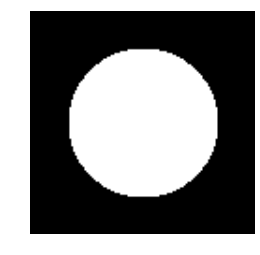

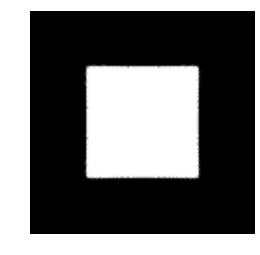

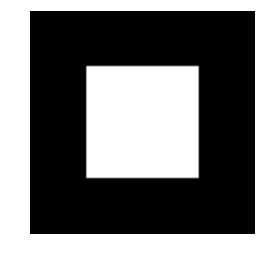

In [8]:
rtk.show(moving_img)
rtk.show(warped_moving_img)
rtk.show(fixed_img)

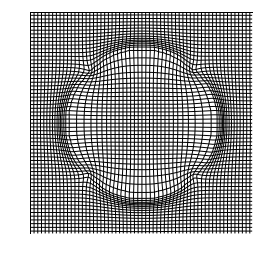

In [9]:
rtk.show(warp, interval=2)